In [1]:
import math
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler

In [2]:
np.set_printoptions(precision=3, suppress=True)

In [3]:
datos_2000 = pd.read_csv('Marginacion_2000.csv')

In [4]:
datos_2000.head()

,CVE_ENT,NOM_ENT,POB_TOT,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL.5000,PO2SM,IM,GM,LUGAR,A.O
0,1,Aguascalientes,944285,4.84,23.03,3.29,1.78,1.30,37.82,3.57,24.54,42.23,-0.97,Bajo,28,2000
1,2,Baja California,2487367,3.53,19.59,0.39,2.33,6.83,36.58,4.59,11.62,22.22,-1.27,Muy bajo,30,2000
2,3,Baja California Sur,424041,4.21,20.98,2.42,4.62,6.32,38.80,10.42,25.41,35.82,-0.80,Bajo,27,2000
3,4,Campeche,690689,11.81,34.22,5.06,8.79,14.61,56.63,14.92,34.51,64.12,0.70,Alto,8,2000
4,5,Coahuila de Zaragoza,2298070,3.87,18.79,1.65,1.42,2.18,37.74,4.55,13.37,34.68,-1.20,Muy bajo,29,2000


In [5]:
variables = datos_2000[['ANALF', 'SPRIM', 'OVSDE', 'OVSEE', 
                        'OVSAE', 'VHAC', 'OVPT', 'PL.5000','PO2SM']]
variables

,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL.5000,PO2SM
0,4.84,23.03,3.29,1.78,1.30,37.82,3.57,24.54,42.23
1,3.53,19.59,0.39,2.33,6.83,36.58,4.59,11.62,22.22
2,4.21,20.98,2.42,4.62,6.32,38.80,10.42,25.41,35.82
3,11.81,34.22,5.06,8.79,14.61,56.63,14.92,34.51,64.12
4,3.87,18.79,1.65,1.42,2.18,37.74,4.55,13.37,34.68
5,7.16,27.20,3.53,1.96,2.18,40.90,12.53,18.20,48.00
6,22.94,50.31,26.44,12.01,24.99,65.03,40.90,61.21,75.89
7,4.79,23.30,4.89,6.27,5.88,36.53,6.96,19.64,37.67
8,2.91,12.16,0.86,0.17,1.47,34.82,1.34,0.32,42.43
9,5.41,28.75,5.85,6.57,7.00,40.30,13.73,42.12,50.12


In [6]:
X_scaled = StandardScaler().fit_transform(variables)

var_cov = np.cov(X_scaled.T)
pd.DataFrame(var_cov)

,0,1,2,3,4,5,6,7,8
0,1.032258,0.944899,0.757673,0.801860,0.843146,0.878899,0.936366,0.825552,0.858086
1,0.944899,1.032258,0.705624,0.787422,0.800743,0.790590,0.849875,0.895520,0.858486
2,0.757673,0.705624,1.032258,0.523629,0.654789,0.709187,0.685749,0.825490,0.702061
3,0.801860,0.787422,0.523629,1.032258,0.886791,0.661477,0.875002,0.771720,0.681090
4,0.843146,0.800743,0.654789,0.886791,1.032258,0.727278,0.886829,0.803866,0.737567
5,0.878899,0.790590,0.709187,0.661477,0.727278,1.032258,0.773590,0.727968,0.855155
6,0.936366,0.849875,0.685749,0.875002,0.886829,0.773590,1.032258,0.775695,0.744979
7,0.825552,0.895520,0.825490,0.771720,0.803866,0.727968,0.775695,1.032258,0.823355
8,0.858086,0.858486,0.702061,0.681090,0.737567,0.855155,0.744979,0.823355,1.032258


In [7]:
def sign(x):
    """
    Helper function for computing sign of real number x.
    """
    if x >=0:
        return 1
    else:
        return -1

def compute_cos_sin_Jacobi_rotation(Ak, idx1, idx2):
    """
    Helper function for computing entries of Jacobi rotation.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        c (float): value of cos of theta for Jacobi rotation matrix.
        s (float): value of sin of theta for Jacobi rotation matrix.
    """
    if np.abs(Ak[idx1,idx2]) >= np.finfo(float).eps:
        tau = (Ak[idx2, idx2] - Ak[idx1, idx1])/(2*Ak[idx1, idx2])
        t_star = sign(tau)/(np.abs(tau) + np.sqrt(1+tau**2))
        c = 1/np.sqrt(1+t_star**2)
        s = c*t_star
    else: #no rotation is performed
        c = 1
        s = 0
    return (c,s)

def compute_Jacobi_rotation(Ak, idx1, idx2):
    """
    Compute Jacobi rotation matrix.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        J (numpy ndarray): Jacobi rotation matrix.
    """
    c,s = compute_cos_sin_Jacobi_rotation(Ak, idx1, idx2)
    m,n = Ak.shape
    J = np.eye(m)
    J[idx1, idx1] = J[idx2, idx2] = c
    J[idx1, idx2] = s
    J[idx2, idx1] = -s
    return J

def off(A):
    """
    Frobenius norm without the main diagonal
    Args:
        Ak (numpy ndarray): Matrix for getting the Frobenius norm.
    Returns:
        s: The Frobenius norm without the sum of the main diagonal indices.
    """
    s = 0
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if j != i:
                s1 = math.sqrt(A[i,j]**2)
                s = s + s1
    return s

def compute_Jacobi_rotation(Ak, idx1, idx2):
    """
    Compute Jacobi rotation matrix.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        J (numpy ndarray): Jacobi rotation matrix.
    """
    c,s = compute_cos_sin_Jacobi_rotation(Ak, idx1, idx2)
    m,n = Ak.shape
    J = np.eye(m)
    J[idx1, idx1] = J[idx2, idx2] = c
    J[idx1, idx2] = s
    J[idx2, idx1] = -s
    return J

def compute_Jacobi_iterative(A, sweeps, tol):
    """
    Compute Jacobi rotation matrix.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        J (numpy ndarray): Jacobi rotation matrix.
    """
    Ak = A.copy()
    for n in range(sweeps):
        for i in range(Ak.shape[0]):
            j = i + 1
            for m in range(Ak.shape[0]-i-1):
                if off(Ak) > tol*np.linalg.norm(Ak):
                    J = compute_Jacobi_rotation(Ak, i, j)
                    Ak = J.T@Ak@J
                    j += 1
                    
    return Ak



def compute_Jacobi_egvectors(A, sweeps):
    """
    Compute Jacobi rotation matrix.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        Qk (numpy ndarray): Eigenvectors
    """
    m,n = A.shape
    Q = np.eye(m)
    for n in range(sweeps):
        for i in range(A.shape[0]):
            j = i + 1
            for m in range(A.shape[0]-i-1):
                if off(A) > (1e-8)*np.linalg.norm(A):
                    J = compute_Jacobi_rotation(A, i, j)
                    Qk = Q@J
                    Q = Qk
                    j += 1
                    
    return Qk

In [8]:
eg_val = compute_Jacobi_iterative(var_cov, 4,10**(-8))

In [9]:
a = []
for i in range(0,9):
    a.append(pd.DataFrame(eg_val).loc[i,i].round(4))
    
eig = sorted(a, reverse=True)
eig

[7.3544, 0.6511, 0.4141, 0.2976, 0.2154, 0.1358, 0.1162, 0.069, 0.0367]

In [10]:
values, vectors = np.linalg.eig(var_cov)
sorted(values.round(4), reverse=True)

[7.3544, 0.6511, 0.4141, 0.2976, 0.2154, 0.1358, 0.1162, 0.069, 0.0367]

In [13]:
e_vectors = compute_Jacobi_egvectors(var_cov,6)

In [32]:
projected_1 = e_vectors[0].T@X_scaled.T
projected_2 = e_vectors[1].T@X_scaled.T
projected_3 = e_vectors[2].T@X_scaled.T
projected_4 = e_vectors[3].T@X_scaled.T
projected_5 = e_vectors[4].T@X_scaled.T
projected_6 = e_vectors[7].T@X_scaled.T
projected_7 = e_vectors[8].T@X_scaled.T
projected_8 = e_vectors[6].T@X_scaled.T
projected_9 = e_vectors[5].T@X_scaled.T


res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['PC3'] = projected_3
res['PC4'] = projected_4
res['PC5'] = projected_5
res['PC6'] = projected_6
res['PC7'] = projected_7
res['PC8'] = projected_8
res['PC9'] = projected_9
res['IM'] = datos_2000['IM']
res['GM'] = datos_2000['GM']
res

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,IM,GM
0,-1.004565,-1.214638,-0.572857,-1.163865,1.057558,1.186731,0.100305,0.476900,-0.250397,-0.97,Bajo
1,-1.902141,-0.219388,-1.491270,-1.855981,1.264537,1.132801,-0.263743,0.833544,-0.780372,-1.27,Muy bajo
2,-1.257298,-0.013512,-0.264474,-1.327159,0.959299,0.963718,-0.188398,0.472493,-0.361124,-0.80,Bajo
3,-0.158732,0.329393,0.780431,1.325597,-1.196870,-0.422556,-0.608595,0.280442,0.615306,0.70,Alto
4,-1.640635,-0.974744,-0.959183,-1.701516,0.940645,1.209168,0.214207,0.714283,-0.601076,-1.20,Muy bajo
5,-0.632642,-0.779576,-0.477800,-0.549981,0.324189,1.104133,0.656569,0.711634,-0.428489,-0.69,Bajo
6,2.997095,2.369107,1.641563,3.339191,-2.215814,-2.267283,-0.289978,-0.551157,0.287343,2.25,Muy alto
7,-1.593532,-0.033196,-0.341954,-0.800129,1.058518,1.121295,-0.212329,-0.012619,-0.526622,-0.78,Bajo
8,-2.518929,-1.581707,-0.976902,-1.983699,0.917256,1.196170,1.059858,0.624716,-0.477004,-1.53,Muy bajo
9,-0.209219,0.142235,0.586312,-0.289066,0.810510,0.902717,-0.271526,-0.027125,0.273266,-0.11,Medio


In [33]:
explained_variances = []
for i in range (len(eig)):
    explained_variances.append(eig[i]/np.sum(eig))
    
print(explained_variances)

[0.7916213685241595, 0.07008385089824871, 0.044573372226946385, 0.03203341119231887, 0.023185473020246924, 0.01461739663950572, 0.012507669289473966, 0.007427101385315868, 0.003950356823783947]


/Users/anatorres/.pyenv/versions/3.7.4/envs/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

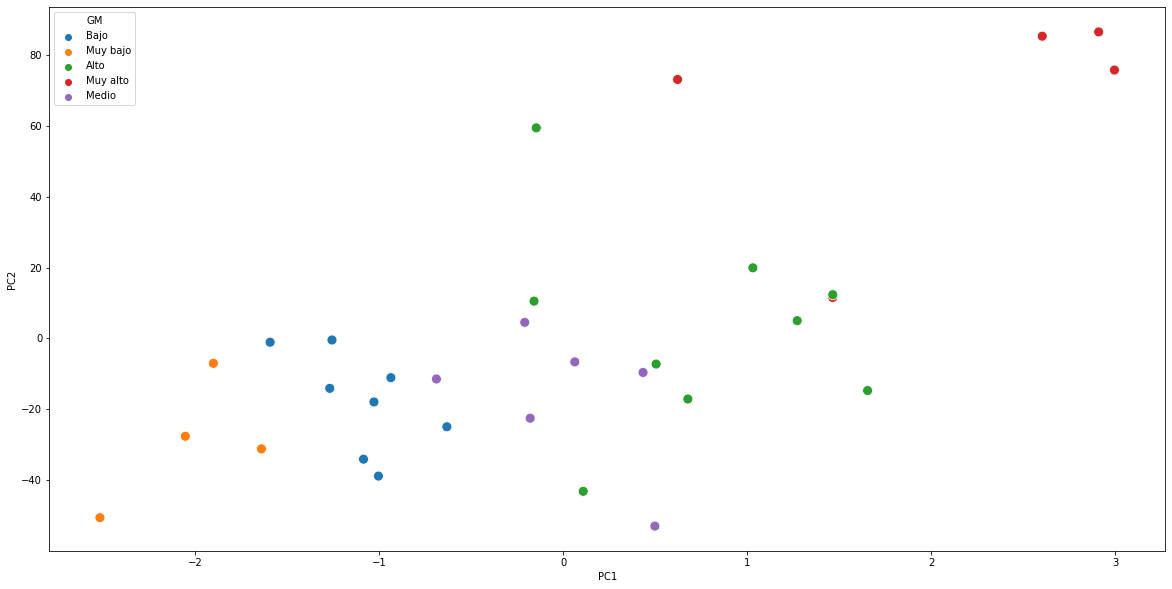

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], res['PC2'] * len(res), hue=res['GM'], s=100)

Para este año los componentes principales que mejor parecen clasificar los estados son el primer y el quinto componente principal

In [37]:
res.to_csv('PCA_2000.csv', index = False)

Nuestro nuevo índice de marginación es el siguiente:

In [38]:
ultimo = res[['PC1', 'IM', 'GM']]
ultimo.to_csv('IM_PCA_2000.csv', index = False)

In [39]:
ultimo.sort_values(by='PC1')

,PC1,IM,GM
8,-2.518929,-1.53,Muy bajo
18,-2.054613,-1.39,Muy bajo
1,-1.902141,-1.27,Muy bajo
4,-1.640635,-1.20,Muy bajo
7,-1.593532,-0.78,Bajo
27,-1.269234,-0.69,Bajo
2,-1.257298,-0.80,Bajo
14,-1.085790,-0.60,Bajo
13,-1.029076,-0.76,Bajo
0,-1.004565,-0.97,Bajo
